In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Categorical Data and Bar Charts
-----------------------------

Now that we have examined several graphics produced by others, it is time to produce some of our own. We will start with *bar charts*, a type of graph with which you might already be familiar. A bar chart shows the distribution of a *categorical variable*, that is, a variable whose values are categories. In human populations, examples of categorical variables include gender, ethnicity, marital status, country of citizenship, and so on.

A bar chart consists of a sequence of rectangular bars, one corresponding to each category. The length of each bar is proportional to the number of entries in the corresponding category.

The Kaiser Family Foundation has complied Census data on the distribution of race and ethnicity in the United States. 

http://kff.org/other/state-indicator/distribution-by-raceethnicity/

http://kff.org/other/state-indicator/children-by-raceethnicity/

Here are some of the data, arranged by state. The table ``children`` contains data for people who were younger than 18 years old in 2014; ``everyone`` contains the data for people of all ages in 2014. Some missing values in these tables are represented as 0. 

In [2]:
everyone = Table.read_table('kaiser_ethnicity_everyone.csv')
children = Table.read_table('kaiser_ethnicity_children.csv')
children.set_format(2, NumberFormatter)
everyone.set_format(2, NumberFormatter)

State,Race/Ethnicity,Population
Alabama,White,"3,167,600"
Alabama,Black,"1,269,200"
Alabama,Hispanic,"191,000"
Alabama,Asian,"77,300"
Alabama,American Indian/Alaska Native,0
Alabama,Two Or More Races,"56,100"
Alabama,Total,"4,768,000"
Alaska,White,"396,400"
Alaska,Black,"17,000"
Alaska,Hispanic,"59,200"


The method `barh` takes two arguments, a column containing categories and a column containing numeric quantities. It generates a horizontal bar chart. This chart focuses on California.

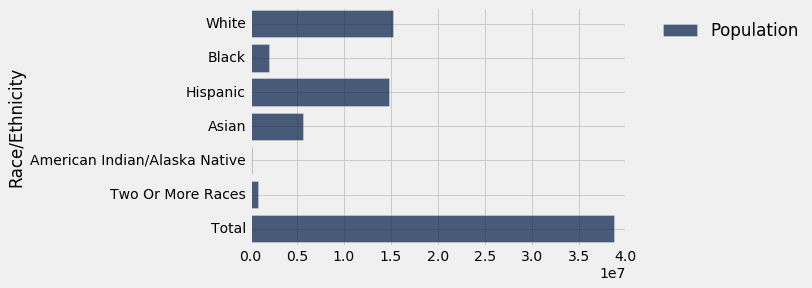

In [3]:
everyone.where('State', 'California').barh('Race/Ethnicity', 'Population')

The table of children also contains information about California, although there are fewer categories of race/ethnicity.

In [4]:
children.where('State', 'California')

State,Race/Ethnicity,Population
California,White,"2,786,000"
California,Black,"484,200"
California,Hispanic,"4,849,400"
California,Other,"1,590,100"
California,Total,"9,709,700"


Again, we can dispaly these data in a horizontal bar chart. The `barh` method can take column indices as well as labels. This chart looks similar, but involves fewer categories because the Kaiser Family Foundation only provides these data about children.

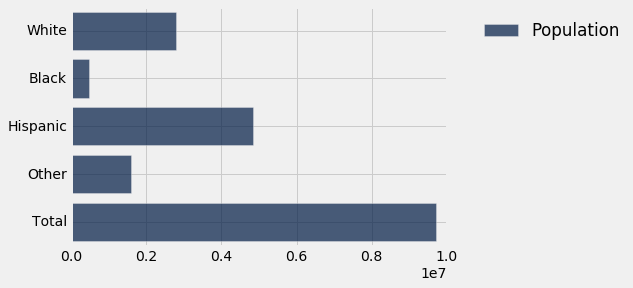

In [5]:
children.where('State', 'California').barh(1, 2)

It's not obvious how to compare these two charts. To help us draw conclusions, we will combine these two tables into one, which contains both everyone and children as separate columns. This transformation will require several steps. First, to ensure that values are comparable, we will divide each population by the total for the state to compute state proportions.

In [6]:
totals = everyone.join('State', everyone.where(1, 'Total').relabeled('Population', 'State Total')).drop(3)
totals

State,Race/Ethnicity,Population,State Total
Alabama,White,3167600,4768000
Alabama,Black,1269200,4768000
Alabama,Hispanic,191000,4768000
Alabama,Asian,77300,4768000
Alabama,American Indian/Alaska Native,0,4768000
Alabama,Two Or More Races,56100,4768000
Alabama,Total,4768000,4768000
Alaska,White,396400,695700
Alaska,Black,17000,695700
Alaska,Hispanic,59200,695700


In [7]:
proportions = everyone.select([0, 1]).with_column('Proportion', totals.column(2)/totals.column(3))
proportions.set_format(2, PercentFormatter)

State,Race/Ethnicity,Proportion
Alabama,White,66.43%
Alabama,Black,26.62%
Alabama,Hispanic,4.01%
Alabama,Asian,1.62%
Alabama,American Indian/Alaska Native,0.00%
Alabama,Two Or More Races,1.18%
Alabama,Total,100.00%
Alaska,White,56.98%
Alaska,Black,2.44%
Alaska,Hispanic,8.51%


This same transformation can be applied to the `children` table. Below, we chain together several table methods in order to express the transformation in a single long line. Typically, it's best to express transformations in pieces (above), but programming languages are quite flexible in allowing programmers to combine expressions (below).

In [8]:
children_proportions = children.select([0, 1]).with_column(
    'Children Proportion', children.column(2) / children.join('State', children.where(1, 'Total')).column(4))
children_proportions.set_format(2, PercentFormatter)

State,Race/Ethnicity,Children Proportion
Alabama,White,59.99%
Alabama,Black,30.50%
Alabama,Hispanic,6.41%
Alabama,Other,3.09%
Alabama,Total,100.00%
Alaska,White,46.00%
Alaska,Black,2.60%
Alaska,Hispanic,11.99%
Alaska,Other,39.36%
Alaska,Total,100.00%


The following function takes the name of a state. It joins together the proportions for everyone and children into a single table. When the `join` method combines two columns with different values, only the matching elements are retained. In this case, any race/ethnicity not represented in both tables will be excluded.

In [9]:
def compare(state):
    prop_for_state = proportions.where('State', state).drop(0)
    children_prop_for_state = children_proportions.where('State', state).drop(0)
    joined = prop_for_state.join('Race/Ethnicity', children_prop_for_state)
    joined.set_format([1, 2], PercentFormatter)
    return joined.sort('Proportion')

compare('California')

Race/Ethnicity,Proportion,Children Proportion
Black,5.34%,4.99%
Hispanic,38.21%,49.94%
White,39.20%,28.69%
Total,100.00%,100.00%


The `barh` method can display the data from multiple columns on a single chart. When called with only one argument indicating the column of categories, all other columns are displayed as sets of bars.

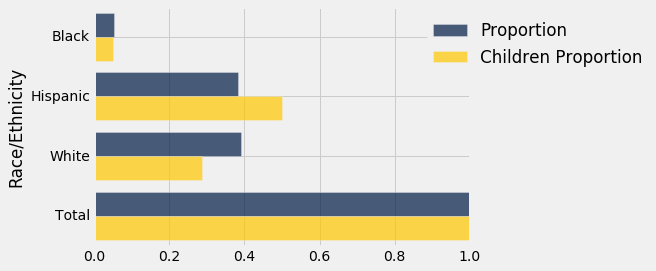

In [10]:
compare('California').barh('Race/Ethnicity')

This chart shows the changing composition of the state of California. In 2014, fewer than 40% of Californians were Hispanic. But 50% of the children were, which is the crucial ingredient in predictions that Hispanics will eventually be a majority in California.

What about other states? Our function allows quick visual comparisons for any state.

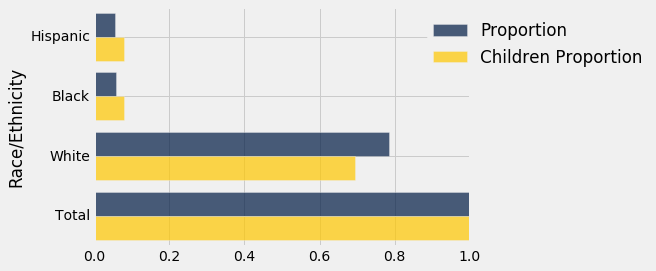

In [11]:
compare('Minnesota').barh('Race/Ethnicity')

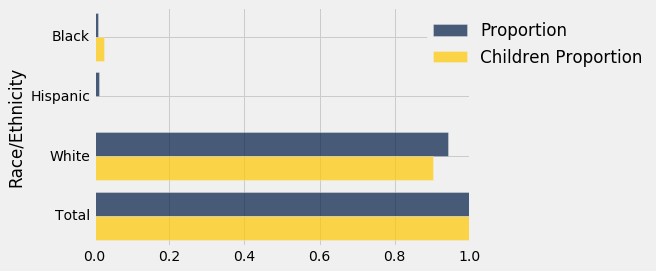

In [12]:
compare('Vermont').barh('Race/Ethnicity')